[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 탐색 
#### (1) 데이터를 탐색하고 탐색 결과를 제시하시오.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv')
df.head()

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [7]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [8]:
df['is_canceled'].value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

In [163]:
df.groupby(['deposit_type']).mean()['adr']

deposit_type
No Deposit    101.965190
Non Refund     89.689476
Refundable     67.456154
Name: adr, dtype: float64

In [160]:
df.deposit_type.describe()

count          20000
unique             3
top       No Deposit
freq           19138
Name: deposit_type, dtype: object

In [161]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


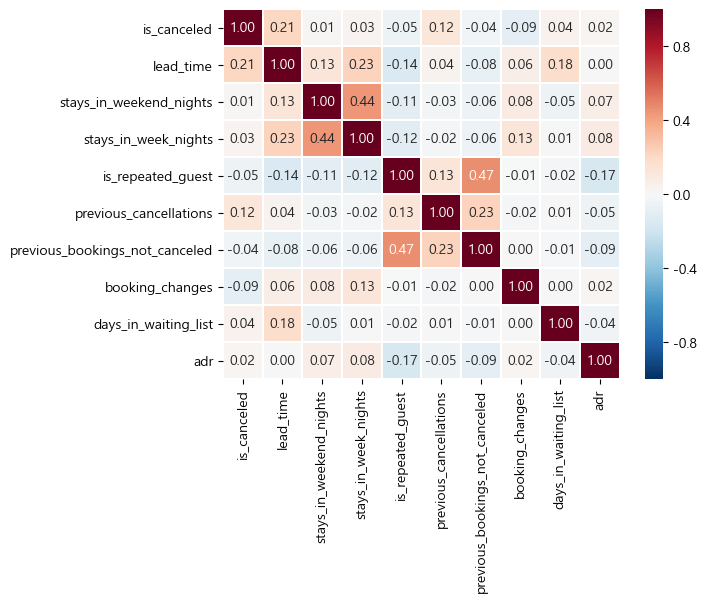

In [17]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu_r', linewidth=.3)
plt.show()

[해석]
- 결측치 존재 여부
    - object 타입의 deposit_type 변수, float 타입의 is_repeated_guest, adr 변수에 결측치가 존재하기에, 결측치를 다른 값으로 대체할 필요가 있음.
- 데이터 타입 설명
    - 종속변수인 is_canceled 변수는 int형, 나머지 독립변수는 int, float, object형으로 구성되어 있음.
    - 따라서 회귀분석이 아닌 분류분석으로 진행해야 하며, 각 class 개수의 차이가 크므로 데이터 불균형 문제를 주의해야 함.
    - object형인 독립변수는 인코딩을 통해 변화해줄 필요가 있음.
- 변수 간 상관관계 성명
    - 종속변수와 강한 상관성을 보이는 독립변수는 보이지 않았으며, 다중공선성을 걱정할 만큼 독립변수끼리의 상관성이 큰 변수는 보이지 않음.

#### (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [164]:
# 결측치 확인
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [169]:
print('lead_time 결측치 비율:', round( 5/len(df) *100, 2), '%')
print('is_repeated_guest 결측치 비율:', round( 358/len(df) *100, 2), '%')
print('adr 결측치 비율:',round( 1063/len(df) *100, 2), '%')

lead_time 결측치 비율: 0.03 %
is_repeated_guest 결측치 비율: 1.79 %
adr 결측치 비율: 5.32 %


In [178]:
# 결측치 대체
df_nonull = df

## lead time 변수의 결측치는 1%가 되지 않으므로 제거함
df_nonull.dropna(subset=['lead_time'], axis=0, inplace=True)

## is_repeated_guest 변수는 binary이기 때문에 최빈값으로 대체
df_nonull['is_repeated_guest'] = df_nonull['is_repeated_guest'].fillna(0)

## adr 변수는 연속형 변수이기 때문에 평균대치법을 사용함. 
## 다만, 보증금 유형에 따라 adr이 다르기 때문에 adr 그룹별 평균을 이용해 결측값을 대체함.
fill_mean_func = lambda g: g.fillna(g.mean())
df_nonull = df_nonull.groupby(['deposit_type']).apply(fill_mean_func)
df_nonull.index = df_nonull.index.droplevel(0)
df_nonull.sort_index(inplace=True)

df_nonull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

[해석]
- lead_time 변수는 결측치가 1% 미만이므로 결측치가 있는 행을 삭제함.
- is_repeated_guest 변수의 결측치는 최빈값으로 대체함.
- adr 변수의 결측치는 deposit_type별 평균 adr로 대체함.

In [134]:
# # 내가 푼 방법
# from sklearn.impute import KNNImputer

# # 결측치가 있는 데이터만 추출
# KNN_data = df[['lead_time', 'is_repeated_guest', 'adr']]

# # 모델링
# imputer = KNNImputer()
# df_filled = imputer.fit_transform(KNN_data)
# df_filled = pd.DataFrame(df_filled, columns=KNN_data.columns)
# df[KNN_data.columns] = df_filled

# cond = df[df['is_repeated_guest'].isna()]

# df.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

[내가 푼 방법에 대한 나의 해석]
- object 타입의 deposit_type 변수, float 타입의 is_repeated_guest, adr 변수에 결측치가 존재하기에, 결측치를 다른 값으로 대체할 필요가 있음.
- 연속형 변수는 평균값, 중앙값, KNN 알고리즘을 활용한 방법 등으로 대체할 수 있으며, 범주형 변수는 최빈값으로 대체할 수 있음.
- 해당 분석에서는 연속형 변수만 결측치가 존재하므로 KNN 알고리즘을 활용한 방법으로 진행함.

#### (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오.
[해석]
- IQR 방식으로 lead_time 변수의 이상치를 보정하여 극단적인 값을 제거함으로써 모델에 특정값이 영향을 주는 경우를 방지함.
- is_repeated_guest 변수에서 '1'에 해당하는 데이터를 더 수집해 해당 변수의 불균형을 해소함.

[나의 해석]
- 결측치 대체
    - 999, NaN 등의 값은 결측치일 가능성이 있기에 이를 평균, 중앙값, 최빈값 등으로 대체한다면 데이터 질이 상향될 수 있음.
- 이상치 대체
    - 상자그림 및 히스토그램 등으로 데이터 분포를 확인하여 이상치 유무를 확인할 수 있음. 
    - 분포와 크게 동떨어진 값은 이상치일 가능성을 염두하고 평균, 중앙값, 최빈값 등으로 대체하면 데이터 질이 상향될 수 있음.  

<AxesSubplot:xlabel='value', ylabel='col'>

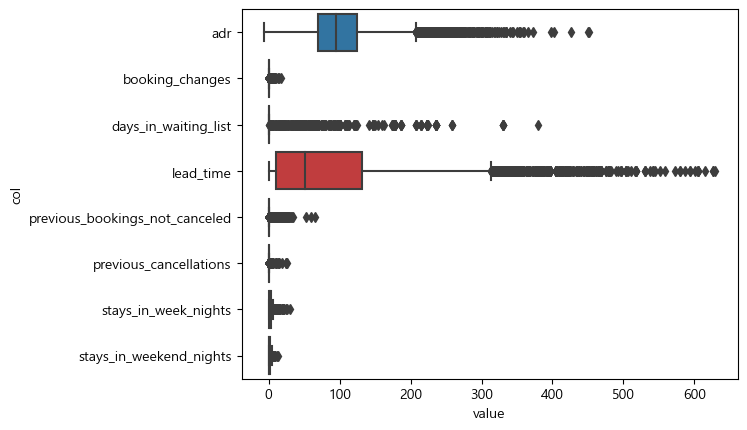

In [85]:
num_col = df.columns.difference(['deposit_type', 'is_canceled', 'is_repeated_guest'])
df_sample = pd.melt(df[num_col], var_name='col', value_name='value')
sns.boxplot(data=df_sample, y='col', x='value')

#### (4) 데이터 불균형을 시각화하여 식별하고 불균형 판단 근거를 작성하시오.

In [192]:
df['is_canceled'].value_counts()
print('0 비율: ', round(17595/len(df_nonull)*100, 2), '%')
print('1 비율: ', round(2400/len(df_nonull)*100, 2), '%')

0 비율:  88.0 %
1 비율:  12.0 %


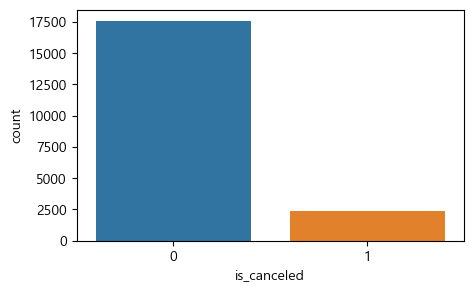

In [90]:
plt.figure(figsize=(5,3))
sns.countplot(df['is_canceled'])
plt.show()

[해석]
- 종속변수인 is_canceled의 클래스 개수를 시각화 하면 0값이 1값보다 압도적으로 많은 것을 알 수 있기에 데이터 불균형 문제가 있다고 할 수 있음.

#### (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오.
[해석]
- 오버 샘플링은 소수의 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증식시켜 학습에 사용하기 위한 충분한 양과 비율의 데이터를 확보하는 기법임.
- 언더 샘플링은 데이터 손실 문제로 예측 성능이 저하되는 단점이 있으므로, 일반적으로 오버 샘플링을 사용함.
    - Random Over Sampling 기법과 SMOTE 기법이 존재함.
- Random Over Sampling 기법
    - 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법임.
    - 데이터를 단순 복제하고, 소수 클래스에서 과적합이 발생할 수 있지만 사용방법이 간단하다는 장점이 있음.
- SMOTE 기법
    - 소수 레이블을 지닌 데이터세트의 관측값에 대한 K개 최근접 이웃을 찾고, 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법임.
    - Resampling 방식보다 처리 속도가 느리지만 데이터를 단순히 동일하게 증식시키는 방식이 아니기 때문에, 과적합 문제를 예방할 수 있는 장점이 있음.

#### (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오.
[해석]
- Random Over Sampling와 SMOTE 기법을 선정함.
- 이유
    - Random Over Sampling은 간단한 방식으로 데이터 불균형을 해결할 수 있고, SMOTE 방식은 데이터를 생성할 때, 과적합 문제를 방지할 수 있기 때문임.

In [203]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

# 범주형 변수 인코딩
df2 = pd.get_dummies(data=df_nonull, columns=['deposit_type'], drop_first=True)

# 원본 데이터
X = df2.drop(columns=['is_canceled'], axis=1)
y = df2['is_canceled']

# random over sampling data
random_over = RandomOverSampler(random_state=42)
X_ro, y_ro = random_over.fit_resample(X, y)

# smote
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### (7) 오버 샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고, 그 이유를 설명하시오.

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time

start = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=100, test_size=.2)
clf = RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('train 정확도:', clf.score(X_test, y_test), '\n')
print(classification_report(pred, y_test))
print('소요 시간:', time.time()-start)

train 정확도: 0.9317329332333083 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3782
           1       0.44      0.98      0.61       217

    accuracy                           0.93      3999
   macro avg       0.72      0.95      0.79      3999
weighted avg       0.97      0.93      0.94      3999

소요 시간: 2.5332210063934326


In [205]:
start = time.time()
X_ro_train, X_ro_test, y_ro_train, y_ro_test = train_test_split(X_ro, y_ro, stratify=y_ro, random_state=100, test_size=.2)
clf_ro = RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf_ro.fit(X_ro_train, y_ro_train)
pred_ro = clf.predict(X_ro_test)
print('train 정확도:', clf_ro.score(X_ro_test, y_ro_test), '\n')
print(classification_report(pred_ro, y_ro_test))
print('소요 시간:', time.time()-start)

train 정확도: 0.9533958510940608 

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      5504
           1       0.43      1.00      0.61      1534

    accuracy                           0.72      7038
   macro avg       0.72      0.82      0.69      7038
weighted avg       0.88      0.72      0.74      7038

소요 시간: 3.988001823425293


In [206]:
start = time.time()
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, stratify=y_sm, random_state=100, test_size=.2)
clf_ro = RandomForestClassifier(n_estimators=100, min_samples_split=10)
clf_ro.fit(X_sm_train, y_sm_train)
pred_sm = clf.predict(X_sm_test)
print('train 정확도:', clf_ro.score(X_sm_test, y_sm_test), '\n')
print(classification_report(pred_sm, y_sm_test))
print('소요 시간:', time.time()-start)

train 정확도: 0.9512645637965331 

              precision    recall  f1-score   support

           0       1.00      0.64      0.78      5527
           1       0.43      1.00      0.60      1511

    accuracy                           0.71      7038
   macro avg       0.71      0.82      0.69      7038
weighted avg       0.88      0.71      0.74      7038

소요 시간: 4.153893709182739


#### (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오.
